# Plot "flfa_acc" figure

- Load results from './results_plot/fig_flfa_acc_*.csv'
- Requires 3 CSV files in total `['texture', 'australian', 'yeast']`
- **[Warning]:** The font "Times New Roman" is only supported in Microsoft Windows OS!

In [1]:
import os
from pathlib import Path
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.lines import Line2D
from matplotlib.patches import Patch


In [2]:
PATH_ROOT = Path(os.getcwd()).absolute().parent
print(PATH_ROOT)
PATH_OUTPUT = os.path.join(PATH_ROOT, "results_plot")
print(PATH_OUTPUT)


C:\Users\Behzad\Desktop\KatJupy\diva-data-poisoning
C:\Users\Behzad\Desktop\KatJupy\diva-data-poisoning\results_plot


In [3]:
# Load results
file_names = [f'fig_flfa_acc_{data_name}.csv' for data_name in ['texture', 'australian', 'yeast']]
dfs = []
for file_name in file_names:
    _df = pd.read_csv(os.path.join(PATH_OUTPUT, file_name))
    dfs.append(_df)

dfs[0]


,Attack,Rate,Set,Accuracy
0,rand_svm,0.00,Test.Poison,1.00000
1,rand_svm,0.05,Test.Poison,0.99800
2,rand_svm,0.10,Test.Poison,0.99500
3,rand_svm,0.15,Test.Poison,0.98900
4,rand_svm,0.20,Test.Poison,0.97900
...,...,...,...,...
63,falfa_nn,0.20,Train.Poison,0.94350
64,falfa_nn,0.25,Train.Poison,0.96775
65,falfa_nn,0.30,Train.Poison,0.95150
66,falfa_nn,0.35,Train.Poison,0.98000


In [7]:
COLOR_MAP = {
    'rand_svm': 'darkgrey',
    'alfa_svm': '#2e7d32',
    'poison_svm': '#1976d2',
    'falfa_nn': '#d32f2f',
    #  'Train.Poison': '#1b1b1b',
    #  'Test.Poison': '#1b1b1b',
}

my_palette = sns.color_palette(COLOR_MAP.values())
my_palette


[(0.6627450980392157, 0.6627450980392157, 0.6627450980392157),
 (0.1803921568627451, 0.49019607843137253, 0.19607843137254902),
 (0.09803921568627451, 0.4627450980392157, 0.8235294117647058),
 (0.8274509803921568, 0.1843137254901961, 0.1843137254901961)]

In [8]:
FONTSIZE = 13
FIGSIZE = (9, 2.5)
LINEWIDTH = 2.5
TITLES = [
    'Texture (Easy)',
    'Australian (Normal)',
    'Yeast (Hard)',
]
ATTACKS = ['rand_svm', 'alfa_svm', 'poison_svm', 'falfa_nn']

In [5]:
def draw_subplot(df_fig, title, ax):
    line_style = ['Train' if val == 'Train.Poison' else 'Test' for val in df_fig['Set']]
    sns.lineplot(data=df_fig,
                 x='Rate',
                 y='Accuracy',
                 hue='Attack',
                 ax=ax,
                 style=line_style,
                 legend='brief',
                 alpha=0.8,
                 palette=my_palette,
                 linewidth=LINEWIDTH,
                 dashes=True)

    ax.set(xlim=[-0.02, 0.42], ylim=[0.35, 1.05])
    ax.set_title(title)
    ax.set_xlabel('Poisoning Rate')
    ax.set_ylabel('Accuracy')
    ax.set_xticks(np.linspace(0, 0.40, num=5, endpoint=True))
    ax.set_yticks(np.linspace(0.40, 1.00, num=5, endpoint=True))
    ax.get_legend().remove()


Save plot to C:\Users\Behzad\Desktop\KatJupy\diva-data-poisoning\results_plot\flfa_acc.pdf


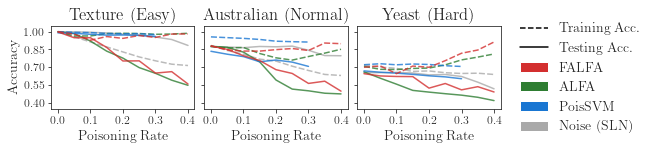

In [32]:
sns.set_style("ticks", rc={"font.size": 11})
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.size": 14, "xtick.labelsize": 12, "ytick.labelsize": 12})
LINEWIDTH = 1.5

fig, axs = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(7, 2))
_axs = []
for i in range(3):
    _axs.append(axs[i])
    df_fig = dfs[i]
    title = TITLES[i]
    draw_subplot(df_fig, title, axs[i])

custom_lines = [
    Line2D([0], [0], color='black', lw=LINEWIDTH, label='Training Acc.', linestyle='dashed'),
    Line2D([0], [0], color='black', lw=LINEWIDTH, label='Testing Acc.'),
    Patch(facecolor=COLOR_MAP['falfa_nn'], label='FALFA'),
    Patch(facecolor=COLOR_MAP['alfa_svm'], label='ALFA'),
    Patch(facecolor=COLOR_MAP['poison_svm'], label='PoisSVM'),
    Patch(facecolor=COLOR_MAP['rand_svm'], label='Noise (SLN)')
]

fig.legend(handles=custom_lines, bbox_to_anchor=(1, 0.95), loc="upper left", frameon=False)

plt.tight_layout(pad=0.3)
path_fig_out = os.path.join(PATH_OUTPUT, 'flfa_acc.pdf', )
plt.savefig(path_fig_out, dpi=300, bbox_inches='tight')
print(f'Save plot to {path_fig_out}')


Save plot to C:\Users\Behzad\Desktop\KatJupy\diva-data-poisoning\results_plot\flfa_acc.pdf


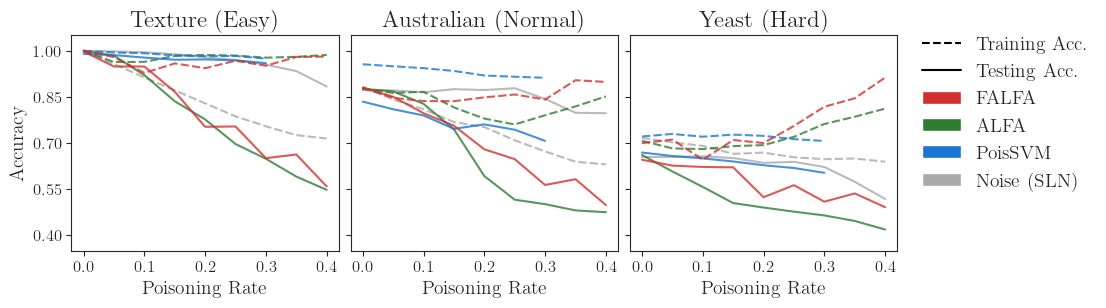

In [12]:
sns.set_style("ticks", rc={"font.size": 11})
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.size": 14, "xtick.labelsize": 12, "ytick.labelsize": 12})
LINEWIDTH = 1.5

fig, axs = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(9, 3))
_axs = []
for i in range(3):
    _axs.append(axs[i])
    df_fig = dfs[i]
    title = TITLES[i]
    draw_subplot(df_fig, title, axs[i])

custom_lines = [
    Line2D([0], [0], color='black', lw=LINEWIDTH, label='Training Acc.', linestyle='dashed'),
    Line2D([0], [0], color='black', lw=LINEWIDTH, label='Testing Acc.'),
    Patch(facecolor=COLOR_MAP['falfa_nn'], label='FALFA'),
    Patch(facecolor=COLOR_MAP['alfa_svm'], label='ALFA'),
    Patch(facecolor=COLOR_MAP['poison_svm'], label='PoisSVM'),
    Patch(facecolor=COLOR_MAP['rand_svm'], label='Noise (SLN)')
]

fig.legend(handles=custom_lines, bbox_to_anchor=(1, 0.95), loc="upper left", frameon=False)

plt.tight_layout(pad=0.3)
path_fig_out = os.path.join(PATH_OUTPUT, 'flfa_acc.pdf', )
plt.savefig(path_fig_out, dpi=300, bbox_inches='tight')
print(f'Save plot to {path_fig_out}')

Save plot to C:\Users\Behzad\Desktop\KatJupy\diva-data-poisoning\results_plot\flfa_acc.pdf


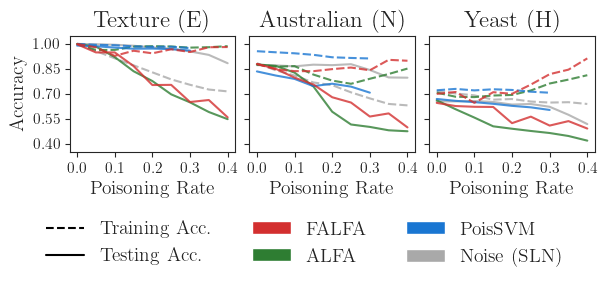

In [12]:
sns.set_style("ticks", rc={"font.size": 11})
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.size": 14, "xtick.labelsize": 11, "ytick.labelsize": 11})
LINEWIDTH = 1.5
TITLES = [
    'Texture (E)',
    'Australian (N)',
    'Yeast (H)',
]

fig, axs = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(6, 2))
_axs = []
for i in range(3):
    _axs.append(axs[i])
    df_fig = dfs[i]
    title = TITLES[i]
    draw_subplot(df_fig, title, axs[i])

custom_lines = [
    Line2D([0], [0], color='black', lw=LINEWIDTH, label='Training Acc.', linestyle='dashed'),
    Line2D([0], [0], color='black', lw=LINEWIDTH, label='Testing Acc.'),
    Patch(facecolor=COLOR_MAP['falfa_nn'], label='FALFA'),
    Patch(facecolor=COLOR_MAP['alfa_svm'], label='ALFA'),
    Patch(facecolor=COLOR_MAP['poison_svm'], label='PoisSVM'),
    Patch(facecolor=COLOR_MAP['rand_svm'], label='Noise (SLN)')
]

fig.legend(handles=custom_lines, bbox_to_anchor=(0.5,-0.2), loc="center", ncol=3, frameon=False)

plt.tight_layout(pad=0.3)
path_fig_out = os.path.join(PATH_OUTPUT, 'flfa_acc.pdf', )
plt.savefig(path_fig_out, dpi=300, bbox_inches='tight')
print(f'Save plot to {path_fig_out}')